# Gradient Boosting Machines (GBM)

## Description:
 Gradient Boosting Machines are powerful ensemble techniques known for their high effectiveness in classification and regression tasks. They build an ensemble of weak prediction models, typically decision trees, in a stage-wise fashion and optimize an arbitrary differentiable loss function.



In [1]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import helper

In [2]:

X_train, X_test, y_train, y_test = helper.get_test_train_split()


n_estimators: 1, RMSE: 1.5457950522358042
n_estimators: 2, RMSE: 1.4968631275562378
n_estimators: 3, RMSE: 1.4507859183766216
n_estimators: 4, RMSE: 1.4166689386357512
n_estimators: 5, RMSE: 1.386706280749911
n_estimators: 6, RMSE: 1.3628908535306121
n_estimators: 7, RMSE: 1.3447304453529572
n_estimators: 8, RMSE: 1.326040410666227
n_estimators: 9, RMSE: 1.3108456435377414
n_estimators: 10, RMSE: 1.3010949350508354
n_estimators: 11, RMSE: 1.2882297407115224
n_estimators: 12, RMSE: 1.2775059888724662
n_estimators: 13, RMSE: 1.2710917409853528
n_estimators: 14, RMSE: 1.2587246430763366
n_estimators: 15, RMSE: 1.2540150400115246
n_estimators: 16, RMSE: 1.2484894072227635
n_estimators: 17, RMSE: 1.2442679814379065
n_estimators: 18, RMSE: 1.2357993361336244
n_estimators: 19, RMSE: 1.2302922912011327
n_estimators: 20, RMSE: 1.21893860017751
n_estimators: 21, RMSE: 1.2181184373743414
n_estimators: 22, RMSE: 1.2160358003741547
n_estimators: 23, RMSE: 1.2137013643237033
n_estimators: 24, RMSE: 

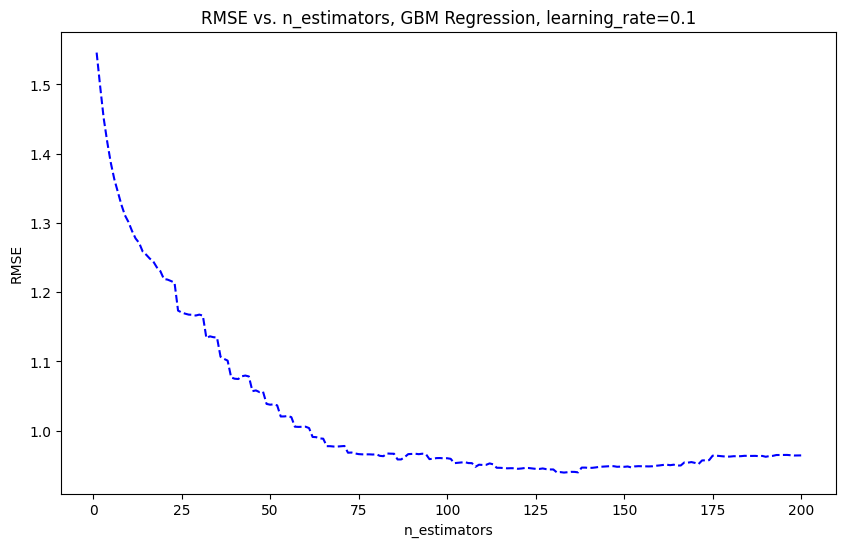

Best n_estimators: 133, RMSE: 0.9395124306239518


In [3]:


n_estimators = np.linspace(1, 200, 200, dtype=int)
results = []
best_estimator = 0
best_rmse = 0

if (1):
    for n in n_estimators:
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f'n_estimators: {n}, RMSE: {rmse}')
        results.append(rmse)
        if best_rmse == 0 or rmse < best_rmse:
            best_rmse = rmse
            best_estimator = n

    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators, results, color='blue', linestyle='dashed', markersize=10)
    plt.title('RMSE vs. n_estimators, GBM Regression, learning_rate=0.1')
    plt.xlabel('n_estimators')
    plt.ylabel('RMSE')
    plt.show()
    print(f'Best n_estimators: {best_estimator}, RMSE: {best_rmse}')


rmse = 84699917.97913244
ratio
count    206.000000
mean       1.180615
std        0.964886
min        0.000715
25%        0.635024
50%        0.920888
75%        1.393603
max        6.829196
Name: revenue, dtype: float64
18.17 -> 17.94 -> 1.26
20.07 -> 19.17 -> 2.45
18.51 -> 19.03 -> 0.60
18.38 -> 18.10 -> 1.31
16.70 -> 17.11 -> 0.66
16.04 -> 15.89 -> 1.16
17.27 -> 17.67 -> 0.67
17.49 -> 17.00 -> 1.62
17.88 -> 17.39 -> 1.64
17.21 -> 17.82 -> 0.54


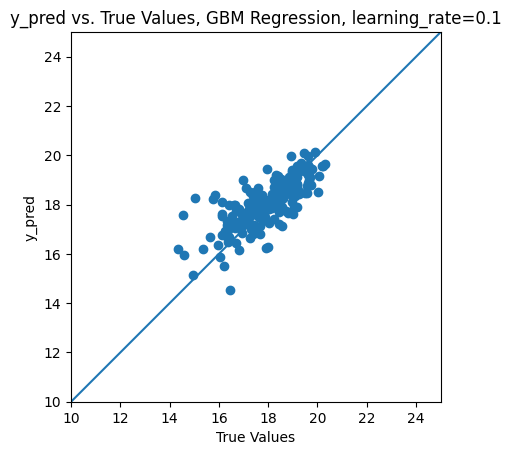

In [4]:
n = 133
model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(helper.revenue_exp(y_test), helper.revenue_exp(y_pred)))
print(f'{rmse = }')

plt.scatter(y_test, y_pred)
plt.title('y_pred vs. True Values, GBM Regression, learning_rate=0.1')
plt.xlabel('True Values')
plt.ylabel('y_pred')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])


ratio = helper.revenue_exp(y_test) / helper.revenue_exp(y_pred)
print("ratio")
print(ratio.describe())

for i in range(10,20):
    print(f'{y_test.iloc[i]:.2f} -> {y_pred[i]:.2f} -> {ratio.iloc[i]:.2f}')